In [1]:
%%capture
%pip install -r ../requirements.txt

In [2]:
import glob

wld_files = glob.glob("../data/users/*.wld")
print(len(wld_files))

25592


In [4]:
from schema import WLD
from tqdm import tqdm

wld_data = []
for file_path in tqdm(wld_files, desc="Loading WLD files"):
    data = WLD(file_path=file_path)
    wld_data.append(data)
print(f"Loaded {len(wld_data)} WLD files.")

Loading WLD files: 100%|██████████| 25592/25592 [01:16<00:00, 334.43it/s]

Loaded 25592 WLD files.


Processing bench press exercises: 100%|██████████| 25592/25592 [00:01<00:00, 18380.80it/s]


Found 449,762 bench press exercises
Average 1RM: 136.8 lbs


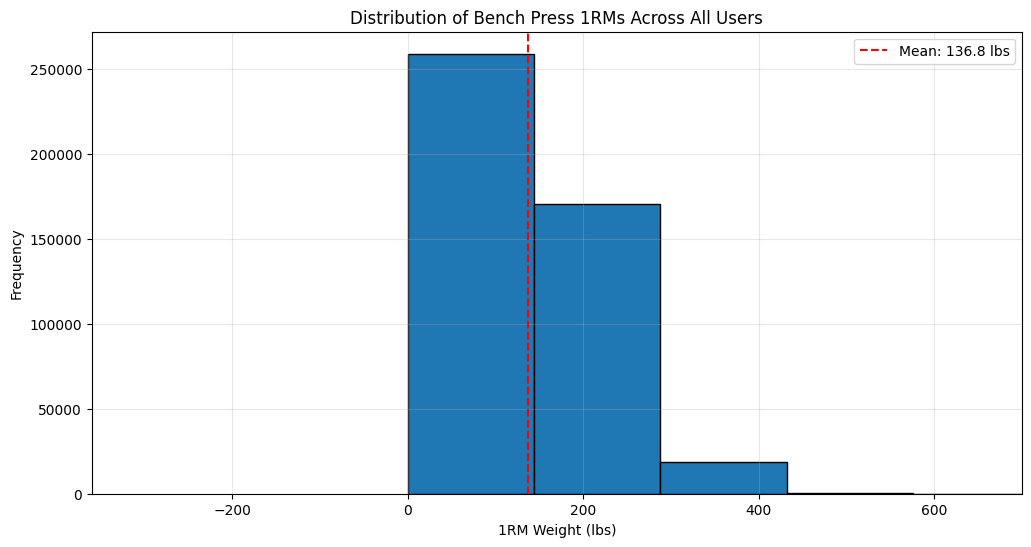

In [7]:
import matplotlib.pyplot as plt

# Get all bench press exercises and their 1RMs
bench_1rms = []
bench_count = 0

for wld in tqdm(wld_data, desc="Processing bench press exercises"):
    for workout in wld.workouts:
        for exercise in workout.exercises:
            if "bench press" in exercise.name.lower() and exercise.style == "reps_weight" and len(exercise.sets) > 0:
                bench_count += 1
                # Get max 1RM from each set
                max_1rm = max([set.oneRM for set in exercise.sets])
                bench_1rms.append(max_1rm)

print(f"Found {bench_count:,} bench press exercises")
print(f"Average 1RM: {sum(bench_1rms)/len(bench_1rms):.1f} lbs")

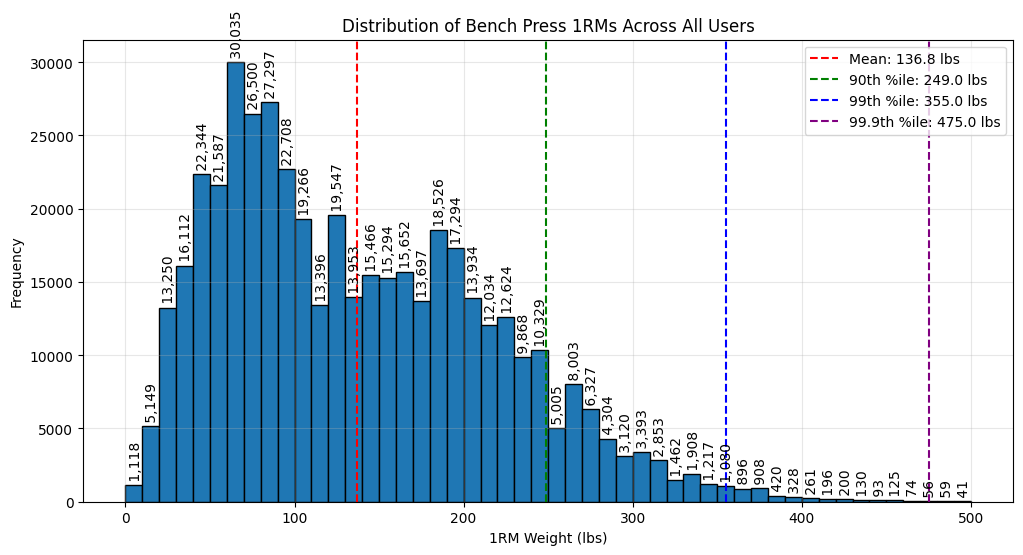

In [30]:
import numpy as np

# Create histogram
plt.figure(figsize=(12, 6))

counts, bins, _ = plt.hist(bench_1rms, bins=50, range=(0, 500), edgecolor="black")
plt.title("Distribution of Bench Press 1RMs Across All Users")
plt.xlabel("1RM Weight (lbs)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)

for i in range(len(counts)):
    if counts[i] > 0:
        plt.text(
            bins[i] + 6,
            counts[i],
            f" {int(counts[i]):,}",
            ha="center",
            va="bottom",
            rotation=90,
            fontsize=10,
        )

mean_1rm = sum(bench_1rms) / len(bench_1rms)
percentile_90 = np.percentile(bench_1rms, 90)
percentile_99 = np.percentile(bench_1rms, 99)
percentile_999 = np.percentile(bench_1rms, 99.9)

plt.axvline(mean_1rm, color="red", linestyle="--", label=f"Mean: {mean_1rm:.1f} lbs")
plt.axvline(
    percentile_90,
    color="green",
    linestyle="--",
    label=f"90th %ile: {percentile_90:.1f} lbs",
)
plt.axvline(
    percentile_99,
    color="blue",
    linestyle="--",
    label=f"99th %ile: {percentile_99:.1f} lbs",
)
plt.axvline(
    percentile_999,
    color="purple",
    linestyle="--",
    label=f"99.9th %ile: {percentile_999:.1f} lbs",
)

plt.legend()
plt.show()